In [1]:
import pandas as pd
import joblib
import functions as fm 

gk_df= pd.read_csv('csv/gk_df.csv')
cb_df= pd.read_csv('csv/cb_df.csv')
fb_df= pd.read_csv('csv/fb_df.csv')
dm_df= pd.read_csv('csv/dm_df.csv')
cm_df= pd.read_csv('csv/cm_df.csv')
am_df= pd.read_csv('csv/am_df.csv')
wf_df= pd.read_csv('csv/wf_df.csv')
st_df= pd.read_csv('csv/st_df.csv')

gk_df_clean = fm.process_player_data(gk_df)
cb_df_clean = fm.process_player_data(cb_df)
fb_df_clean = fm.process_player_data(fb_df)
dm_df_clean = fm.process_player_data(dm_df)
cm_df_clean = fm.process_player_data(cm_df)
am_df_clean = fm.process_player_data(am_df)
wf_df_clean = fm.process_player_data(wf_df)
st_df_clean = fm.process_player_data(st_df)

gk_model = joblib.load('saved_models/gk_model.pkl')
cb_model = joblib.load('saved_models/cb_model.pkl')
fb_model = joblib.load('saved_models/fb_model.pkl')
dm_model = joblib.load('saved_models/dm_model.pkl')
cm_model = joblib.load('saved_models/cm_model.pkl')
am_model = joblib.load('saved_models/am_model.pkl')
wf_model = joblib.load('saved_models/wf_model.pkl')
st_model = joblib.load('saved_models/st_model.pkl')
print(' -')


 -


After initial squad assessment and looking over team stats, I decided to target LW, ST, LB. to address loan gap and reinforce squad holes.

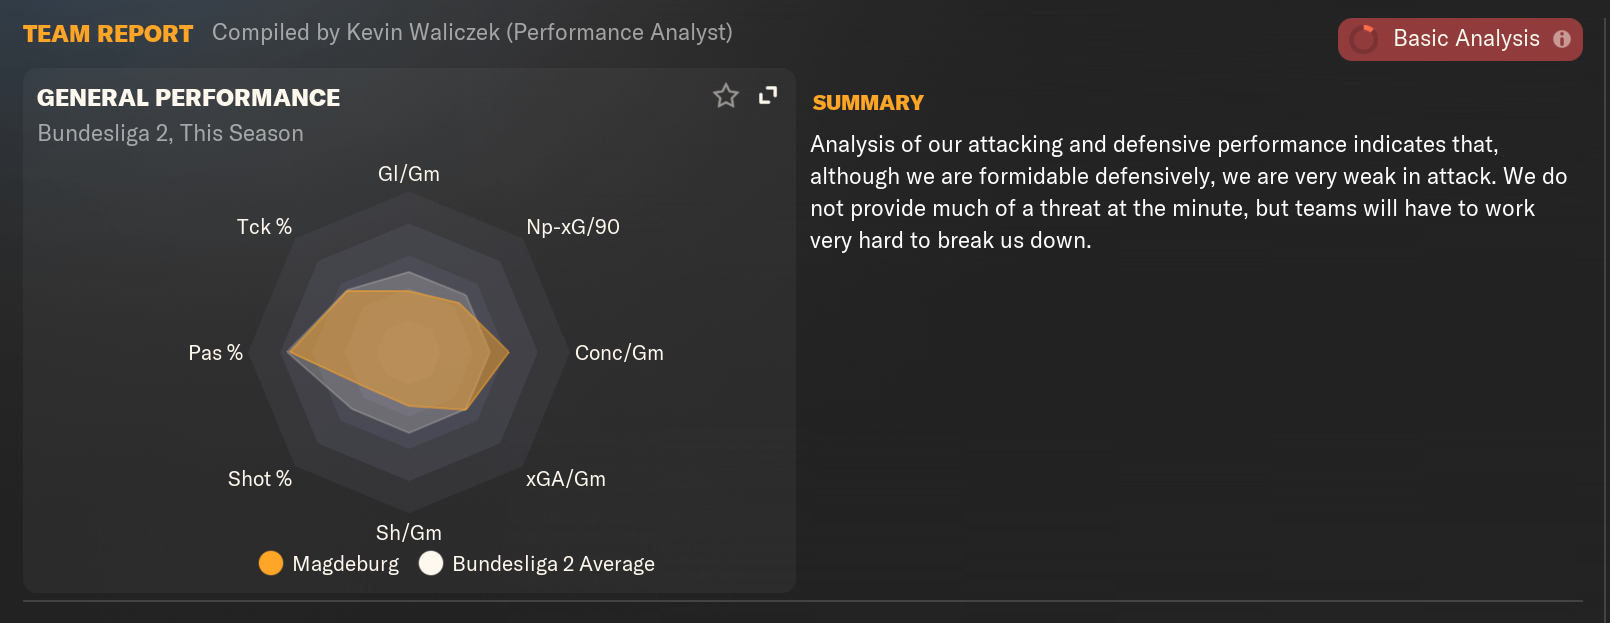

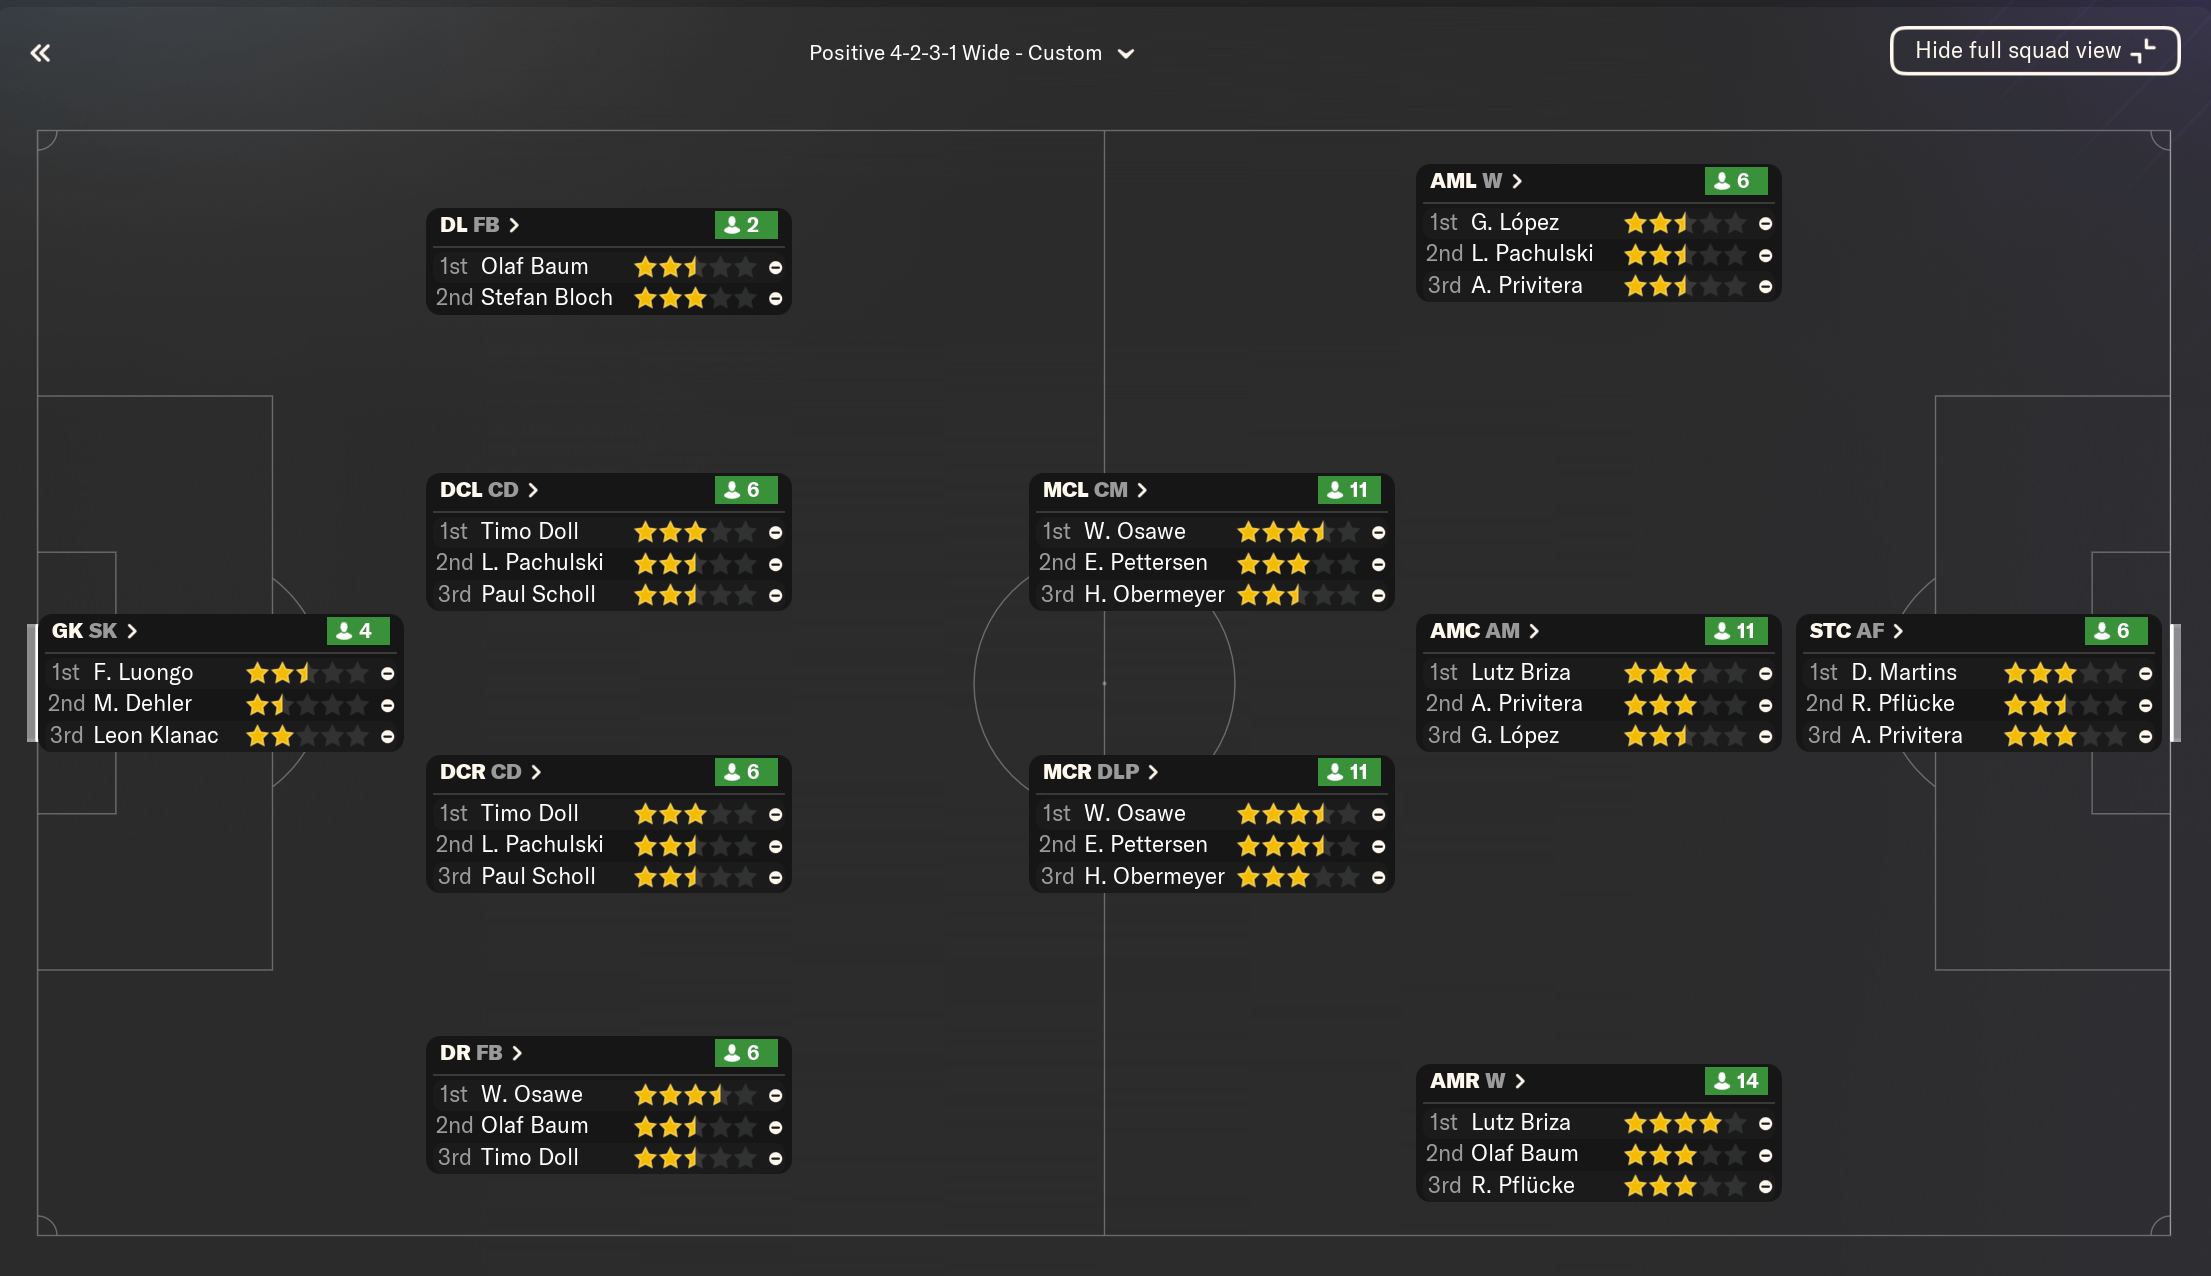

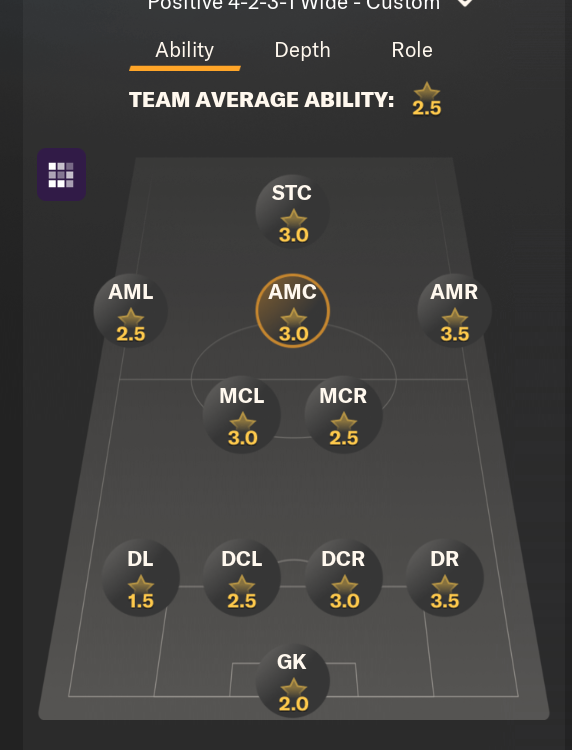

In [2]:
targets = fm.analyze_transfer_targets(fb_df_clean, fb_model)

my_targets = targets[
    (targets['Transfer Value'] <= 500000) &  
    (targets['Wage'] <= 700000)               
]
print('Fullbacks')
print(targets.head(10))

targets = fm.analyze_transfer_targets(wf_df_clean, wf_model)

my_targets = targets[
    (targets['Transfer Value'] <= 500000) &  
    (targets['Wage'] <= 700000)               
]

print('\nWingers')
print(targets.head(10))
print('\n younger prospects')
my_targets = targets[
    (targets['Transfer Value'] <= 500000) &  
    (targets['Wage'] <= 700000) &  
    (targets['Age'] <= 27)               
]

print(my_targets.head(10))
print('\nStrikers')

targets = fm.analyze_transfer_targets(st_df_clean, st_model)


my_targets = targets[
    (targets['Transfer Value'] <= 500000) &  
    (targets['Wage'] <= 700000)               
]

print(targets.head(10))

Fullbacks
                  Name  Age                         Based  \
487         Elkin Ruiz   28                       Ecuador   
279      Yusuf Özdemir   33           Türkiye (1. League)   
911     Lenn-Minh Tran   27  Belgium (Jupiler Pro League)   
105        Omar Campos   32    France (Ligue 1 Uber Eats)   
446   Leonardo Barroso   29     Portugal (Premier League)   
974          José Raúl   24        Spain (First Division)   
621          Mats Rots   28      Netherlands (Eredivisie)   
964  Agustín Pettinato   22  Argentina (Premier Division)   
879       Caner Baştan   26        Türkiye (Super League)   
996         Emre Aksoy   20          Germany (Bundesliga)   

                       Division  Transfer Value    Wage  Intrinsic_Value  \
487                           -          0.0000     0.0         1.622990   
279           Turkish 1. League          0.0930  1500.0         3.849083   
911          Jupiler Pro League          0.1515  3200.0         5.301430   
105           

Saved appealing options in shortlist. Decided not to make any purchases, as club wage and transfer budget was too low. I decided to look into players with contracts expiring in the summer to bring in on a free transfer for next season.

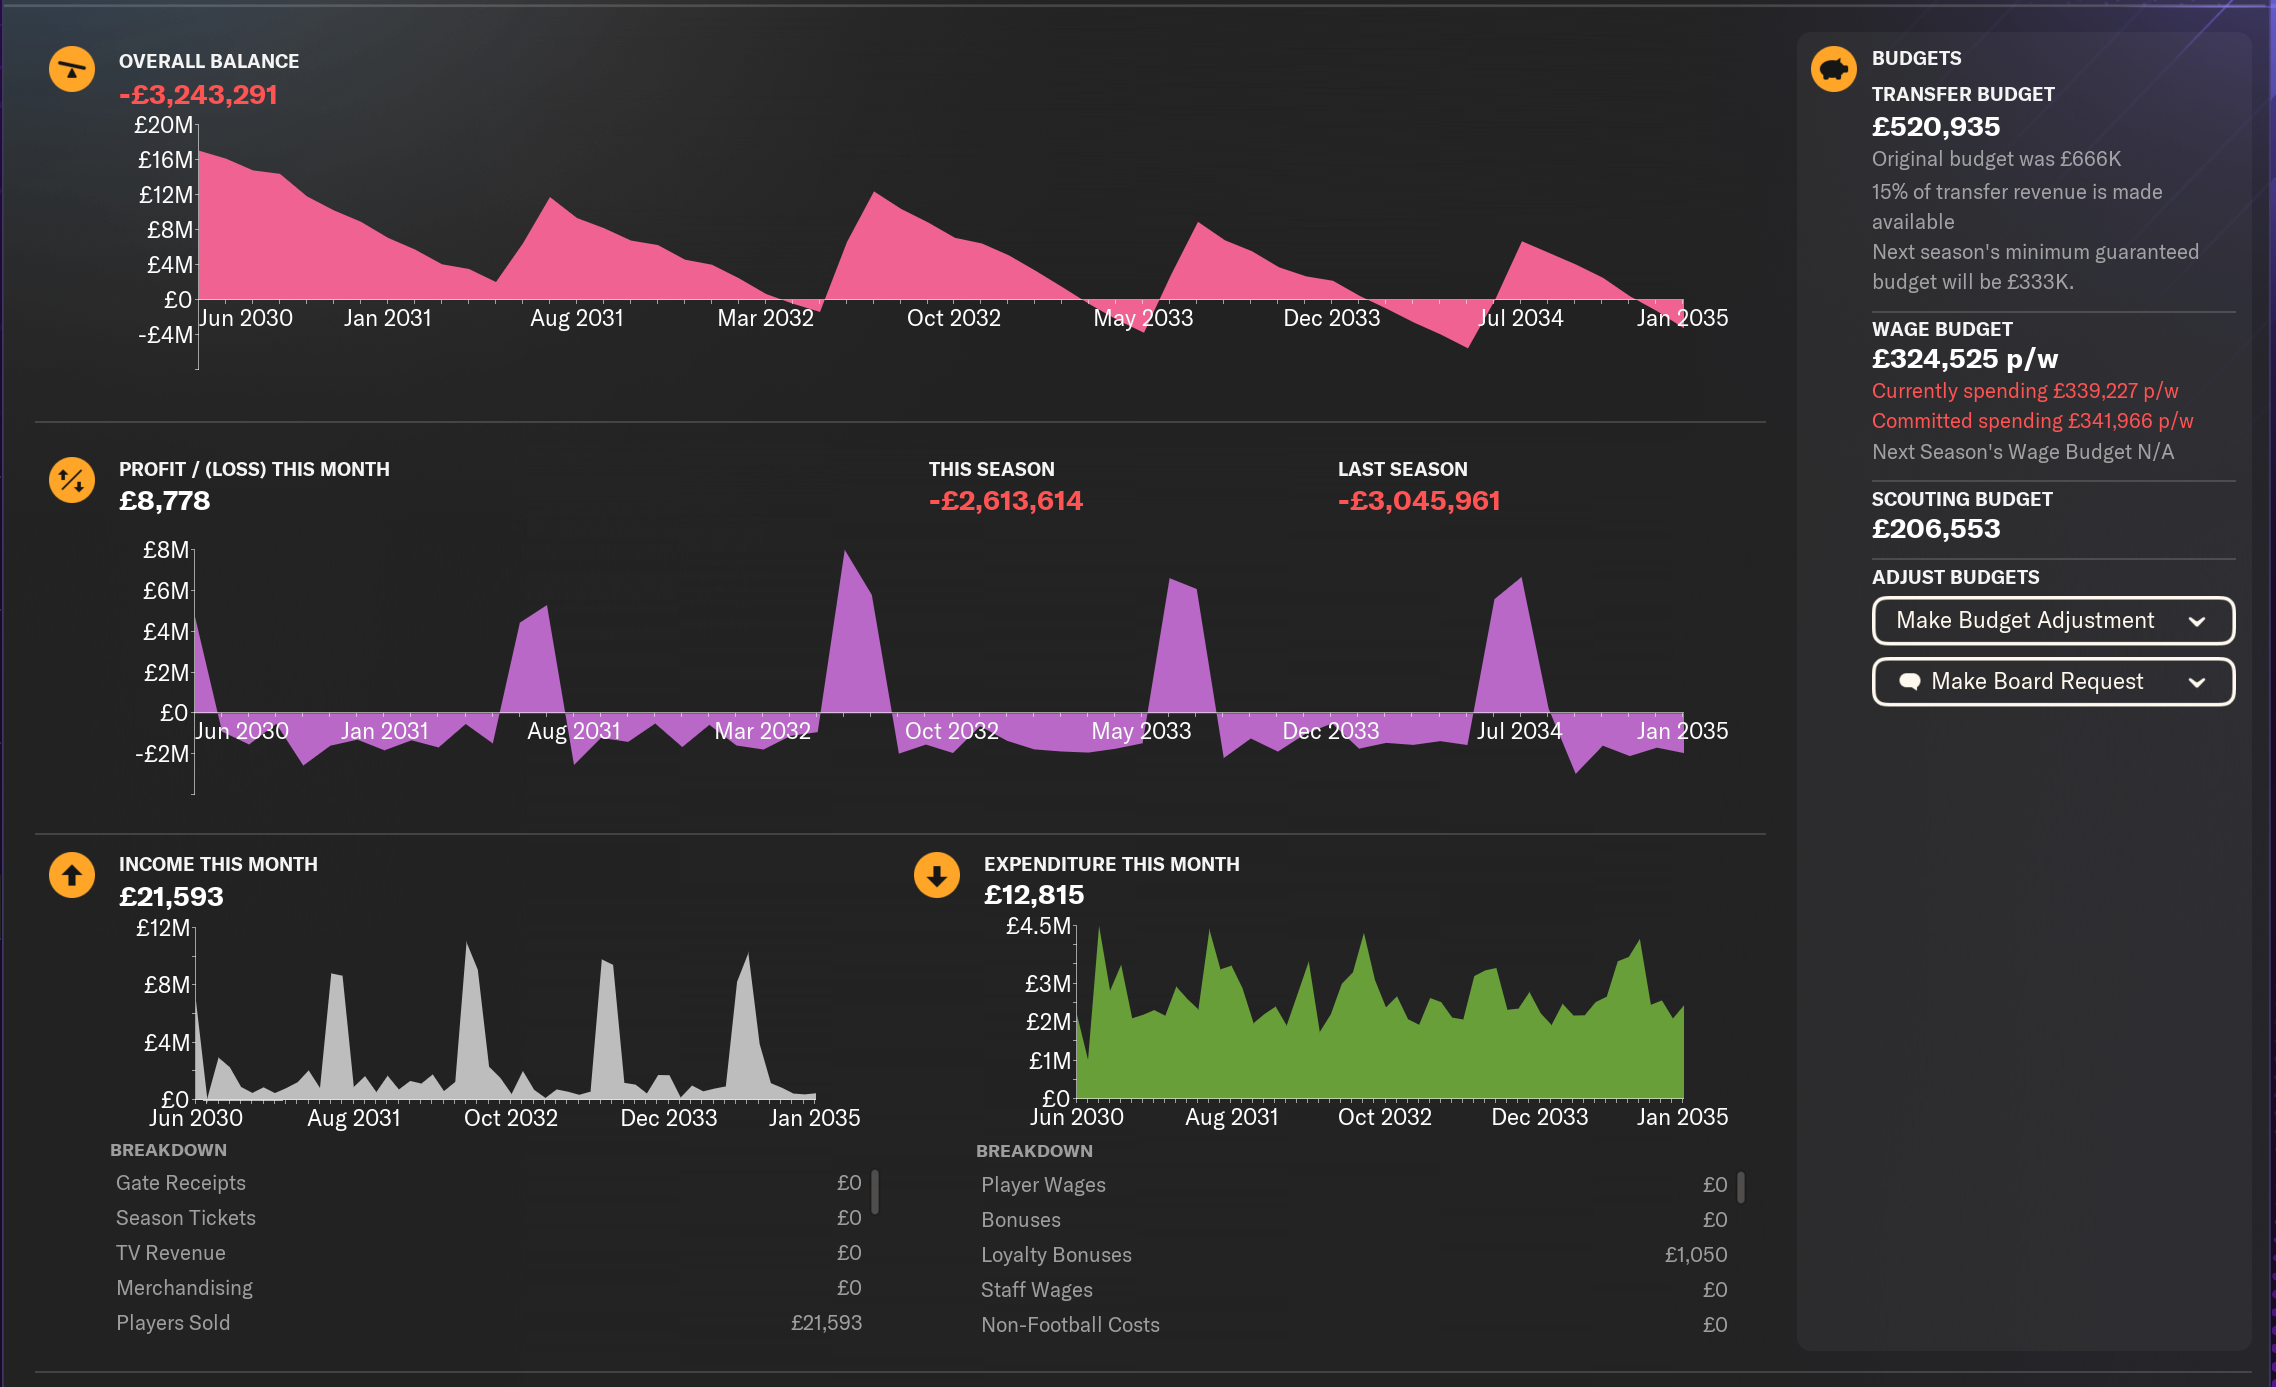

In [3]:
targets = fm.analyze_transfer_targets(fb_df_clean, fb_model)

my_targets = targets[
    (targets['Days Until Expiry'] <= 180)               
]
print('Fullbacks')
print(my_targets.head(10))

targets = fm.analyze_transfer_targets(cm_df_clean, cm_model)

my_targets = targets[
    (targets['Days Until Expiry'] <= 180)  & (targets['Days Until Expiry'] > 1) & (targets['Age'] <= 27)             
]
print('Center Midfielders')
print(my_targets.head(10))

targets = fm.analyze_transfer_targets(wf_df_clean, wf_model)

my_targets = targets[
    ((targets['Days Until Expiry'] <= 180) & (targets['Age'] <= 27))               
]

print('\nWingers')
print(my_targets.head(10))


print('\nStrikers')

targets = fm.analyze_transfer_targets(st_df_clean, st_model)

my_targets = targets[
    (targets['Days Until Expiry'] <= 180)               
]

print(my_targets.head(10))

Fullbacks
                 Name  Age                         Based  \
487        Elkin Ruiz   28                       Ecuador   
279     Yusuf Özdemir   33           Türkiye (1. League)   
911    Lenn-Minh Tran   27  Belgium (Jupiler Pro League)   
974         José Raúl   24        Spain (First Division)   
879      Caner Baştan   26        Türkiye (Super League)   
231  Gastón Martirena   35      Uruguay (First Division)   
252      Claudiu Păun   24               Italy (Serie A)   
699  Kassoum Ouattara   30       Spain (Second Division)   
895     Michal Rosiak   29  England (Sky Bet League One)   
943    Bernard Masuch   26          Germany (Bundesliga)   

                     Division  Transfer Value     Wage  Intrinsic_Value  \
487                         -         0.00000      0.0         1.622990   
279         Turkish 1. League         0.09300   1500.0         3.849083   
911        Jupiler Pro League         0.15150   3200.0         5.301430   
974    Spanish First Division

multiple players i pursued wanted to see goalkeepign reinforcements as a condition for joining

In [4]:
targets = fm.analyze_transfer_targets(gk_df_clean, gk_model)

print('Goalkeepers')
print(targets.head(10))


Goalkeepers
                        Name  Age                           Based  \
119                 Ted Curd   28  England (Sky Bet Championship)   
248              Shea Connor   29  England (Sky Bet Championship)   
152           Marc Sanmartín   24  England (Sky Bet Championship)   
183                 Max Weiß   30          Germany (Bundesliga 2)   
76              Erik Bonilla   21                 Italy (Serie A)   
94   Marcel Mendes-Dudziński   29  England (Sky Bet Championship)   
337            Kazuki Fujita   33                    U.S.A. (MLS)   
124              Diogo Pinto   30                 Italy (Serie A)   
126           Filip Andersen   26      England (Premier Division)   
158          Rüzgar Adıyaman   28          Germany (Bundesliga 2)   

                     Division  Transfer Value     Wage  Intrinsic_Value  \
119      Sky Bet Championship          1.3500  14000.0         6.050571   
248      Sky Bet Championship          0.2075   8750.0         3.180914   
152

In [5]:
targets = fm.analyze_transfer_targets(cb_df_clean, cb_model)

print('Center Backs')
print(targets.head(10))


Center Backs
                     Name  Age                         Based  \
899            Yoni Gomis   29     Norway (Premier Division)   
967      Muhammed Akdoğan   24        Türkiye (Super League)   
972  Gianluca Petrazzuolo   23               Italy (Serie A)   
941    Cristiano Limoeiro   22               Italy (Serie B)   
604          Hüseyin Tunç   26        Türkiye (Super League)   
890         Hichem Jabeur   25  Belgium (Jupiler Pro League)   
687     José Reis Ribeiro   26     Portugal (Premier League)   
958           Buğra Ünver   26        Türkiye (Super League)   
959         Sergio Medina   26    France (Ligue 1 Uber Eats)   
200            João Muniz   29               Italy (Serie A)   

                       Division  Transfer Value     Wage  Intrinsic_Value  \
899  Norwegian Premier Division          0.7700   6750.0         5.744826   
967        Turkish Super League          0.0880   4200.0         3.104478   
972             Italian Serie A          0.1160   5

free agent search winter 2036

In [6]:
cb_df= pd.read_csv('csv/cb_36_df.csv')
fb_df= pd.read_csv('csv/fb_36_df.csv')
dm_df= pd.read_csv('csv/dm_36_df.csv')
cm_df= pd.read_csv('csv/cm_36_df.csv')
am_df= pd.read_csv('csv/am_36_df.csv')
wf_df= pd.read_csv('csv/wf_36_df.csv')
st_df= pd.read_csv('csv/st_36_df.csv')

gk_df_clean = fm.process_player_data(gk_df)
cb_df_clean = fm.process_player_data(cb_df)
fb_df_clean = fm.process_player_data(fb_df)
dm_df_clean = fm.process_player_data(dm_df)
cm_df_clean = fm.process_player_data(cm_df)
am_df_clean = fm.process_player_data(am_df)
wf_df_clean = fm.process_player_data(wf_df)
st_df_clean = fm.process_player_data(st_df)

In [7]:
targets = fm.analyze_transfer_targets(fb_df_clean, fb_model)

print('Fullbacks')
print(targets)

targets = fm.analyze_transfer_targets(cb_df_clean, cb_model)

print('\nCenter Backs')
print(targets)

targets = fm.analyze_transfer_targets(cm_df_clean, cm_model)

print('\nCenter Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(am_df_clean, am_model)

print('\nAttacking Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(wf_df_clean, wf_model)

print('\nWingers')
print(targets)

targets = fm.analyze_transfer_targets(st_df_clean, st_model)

print('\nStrikers')
print(targets)

Fullbacks
           Name  Age                 Based    Division  Transfer Value  \
0  Joseba Morón   19  Germany (Bundesliga)  Bundesliga             2.2   

      Wage  Intrinsic_Value  Value_Ratio  Value_Score  Days Until Expiry  
0  16750.0         5.717397     1.786686     0.000012               1611  

Center Backs
               Name  Age                                  Based  \
0  Antonio Llorente   23                 Spain (First Division)   
2        Eden Ngoie   22  Netherlands (Keuken Kampioen Divisie)   

                  Division  Transfer Value     Wage  Intrinsic_Value  \
0   Spanish First Division          0.6600  21000.0        16.546799   
2  Keuken Kampioen Divisie          1.8625   3200.0         3.684217   

   Value_Ratio  Value_Score  Days Until Expiry  
0     9.967951     0.000189                150  
2     1.287063     0.000028                515  

Center Midfielders
           Name  Age                         Based           Division  \
0  Robbie Nairn   

free agent search winter 2037

In [8]:
gk_df= pd.read_csv('csv/gk_37_df.csv')
cb_df= pd.read_csv('csv/cb_37_df.csv')
fb_df= pd.read_csv('csv/fb_37_df.csv')
dm_df= pd.read_csv('csv/dm_37_df.csv')
cm_df= pd.read_csv('csv/cm_37_df.csv')
am_df= pd.read_csv('csv/am_37_df.csv')
wf_df= pd.read_csv('csv/wf_37_df.csv')
st_df= pd.read_csv('csv/st_37_df.csv')

gk_df_clean = fm.process_player_data(gk_df)
cb_df_clean = fm.process_player_data(cb_df)
fb_df_clean = fm.process_player_data(fb_df)
dm_df_clean = fm.process_player_data(dm_df)
cm_df_clean = fm.process_player_data(cm_df)
am_df_clean = fm.process_player_data(am_df)
wf_df_clean = fm.process_player_data(wf_df)
st_df_clean = fm.process_player_data(st_df)

In [9]:
targets = fm.analyze_transfer_targets(gk_df_clean, gk_model)

print('Goalkeepers')
print(targets)

targets = fm.analyze_transfer_targets(fb_df_clean, fb_model)

print('\nFullbacks')
print(targets)

targets = fm.analyze_transfer_targets(cb_df_clean, cb_model)

print('\nCenter Backs')
print(targets)

targets = fm.analyze_transfer_targets(dm_df_clean, dm_model)

print('\nDefensive Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(cm_df_clean, cm_model)

print('\nCenter Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(am_df_clean, am_model)

print('\nAttacking Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(wf_df_clean, wf_model)

print('\nWingers')
print(targets)

targets = fm.analyze_transfer_targets(st_df_clean, st_model)

print('\nStrikers')
print(targets)

Goalkeepers
              Name  Age                          Based  \
3  Giacomo Bellino   20                Italy (Serie A)   
0     Luca Perillo   22                Italy (Serie A)   
1            Pablo   27  Spain (Spanish Federation 1B)   

                              Division  Transfer Value     Wage  \
3                      Italian Serie A          0.0000  11500.0   
0                      Italian Serie A          0.2575  12500.0   
1  Spanish Federation First Division B          0.1200   9000.0   

   Intrinsic_Value  Value_Ratio  Value_Score  Days Until Expiry  
3         7.212680     7.212680     0.000109                149  
0         5.623145     4.471686     0.000048                149  
1         1.829500     1.633482     0.000008                149  

Fullbacks
                Name  Age                                  Based  \
1         Eden Ngoie   23  Netherlands (Keuken Kampioen Divisie)   
0  Gabriele De Marco   25                France (National 2 - C)   

      

free agent search winter 2038

In [10]:
gk_df= pd.read_csv('csv/gk_feb38_df.csv')
cb_df= pd.read_csv('csv/cb_feb38_df.csv')
fb_df= pd.read_csv('csv/fb_feb38_df.csv')
dm_df= pd.read_csv('csv/dm_feb38_df.csv')
cm_df= pd.read_csv('csv/cm_feb38_df.csv')
am_df= pd.read_csv('csv/am_feb38_df.csv')
wf_df= pd.read_csv('csv/wf_feb38_df.csv')
st_df= pd.read_csv('csv/st_feb38_df.csv')

gk_df_clean = fm.process_player_data(gk_df)
cb_df_clean = fm.process_player_data(cb_df)
fb_df_clean = fm.process_player_data(fb_df)
dm_df_clean = fm.process_player_data(dm_df)
cm_df_clean = fm.process_player_data(cm_df)
am_df_clean = fm.process_player_data(am_df)
wf_df_clean = fm.process_player_data(wf_df)
st_df_clean = fm.process_player_data(st_df)

In [11]:
targets = fm.analyze_transfer_targets(gk_df_clean, gk_model)

print('Goalkeepers')
print(targets)

targets = fm.analyze_transfer_targets(fb_df_clean, fb_model)

print('\nFullbacks')
print(targets)

targets = fm.analyze_transfer_targets(cb_df_clean, cb_model)

print('\nCenter Backs')
print(targets)

targets = fm.analyze_transfer_targets(dm_df_clean, dm_model)

print('\nDefensive Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(cm_df_clean, cm_model)

print('\nCenter Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(am_df_clean, am_model)

print('\nAttacking Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(wf_df_clean, wf_model)

print('\nWingers')
print(targets)

targets = fm.analyze_transfer_targets(st_df_clean, st_model)

print('\nStrikers')
print(targets)

Goalkeepers
            Name  Age                            Based  \
2  Justin Broich   19  Germany (Regional Div. Bavaria)   
0   Elijah Smith   29       England (Premier Division)   

                           Division  Transfer Value     Wage  Intrinsic_Value  \
2  German Regional Division Bavaria          1.5875  16000.0         6.839148   
0          English Premier Division          0.4000  44500.0         2.046233   

   Value_Ratio  Value_Score  Days Until Expiry  
2     2.643149     0.000022               1610  
0     1.461595     0.000002                149  

Fullbacks
            Name  Age                       Based                  Division  \
1  Estanis Ollés   27      Spain (First Division)    Spanish First Division   
0  Álvaro Peraza   26  England (Premier Division)  English Premier Division   

   Transfer Value     Wage  Intrinsic_Value  Value_Ratio  Value_Score  \
1           3.025  27500.0        13.173232     3.272853     0.000038   
0           2.400  44500.0 

exploration for summer 2038 transfer window

In [12]:
gk_df= pd.read_csv('csv/gk_38_df.csv')
cb_df= pd.read_csv('csv/cb_38_df.csv')
fb_df= pd.read_csv('csv/fb_38_df.csv')
dm_df= pd.read_csv('csv/dm_38_df.csv')
cm_df= pd.read_csv('csv/cm_38_df.csv')
am_df= pd.read_csv('csv/am_38_df.csv')
wf_df= pd.read_csv('csv/wf_38_df.csv')
st_df= pd.read_csv('csv/st_38_df.csv')

gk_df_clean = fm.process_player_data(gk_df)
cb_df_clean = fm.process_player_data(cb_df)
fb_df_clean = fm.process_player_data(fb_df)
dm_df_clean = fm.process_player_data(dm_df)
cm_df_clean = fm.process_player_data(cm_df)
am_df_clean = fm.process_player_data(am_df)
wf_df_clean = fm.process_player_data(wf_df)
st_df_clean = fm.process_player_data(st_df)

In [13]:
targets = fm.analyze_transfer_targets(gk_df_clean, gk_model)

print('Goalkeepers')
print(targets)

targets = fm.analyze_transfer_targets(fb_df_clean, fb_model)

print('\nFullbacks')
print(targets)

targets = fm.analyze_transfer_targets(cb_df_clean, cb_model)

print('\nCenter Backs')
print(targets)

targets = fm.analyze_transfer_targets(dm_df_clean, dm_model)

print('\nDefensive Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(cm_df_clean, cm_model)

print('\nCenter Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(am_df_clean, am_model)

print('\nAttacking Midfielders')
print(targets)

targets = fm.analyze_transfer_targets(wf_df_clean, wf_model)

print('\nWingers')
print(targets)

targets = fm.analyze_transfer_targets(st_df_clean, st_model)

print('\nStrikers')
print(targets)

Goalkeepers
               Name  Age                         Based  \
0  Emanuel Orellana   25  Argentina (Premier Division)   

                     Division  Transfer Value    Wage  Intrinsic_Value  \
0  Argentine Premier Division            0.66  1500.0         4.420839   

   Value_Ratio  Value_Score  Days Until Expiry  
0     2.663156     0.000151                914  

Fullbacks
                           Name  Age                       Based  \
2   Stian André Kallhovd Hansen   23                      Norway   
7                   Paulo Gomes   26                    Portugal   
10            Shimelis Yohannes   21  England (Premier Division)   
8                Emiliano Rolla   21             Italy (Serie A)   
3                  Joseba Morón   22        Germany (Bundesliga)   

                    Division  Transfer Value     Wage  Intrinsic_Value  \
2                          -           0.000      0.0         2.386472   
7                          -           0.000      0.0   